## 1.Introdução e objetivo
Utilizando um dataset sobre os fatores de risco que causam doenças cardiovasculares(Kaggle - https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data), vamos focar em dois objetivos:

 1. Como manipular os dados para deixar um dataset pronto para quaisquer analises.
 2. Como utilizar uma ferramenta de automação de relatórios - Profilling Report
    
Sem mais delongas, vamos por a mão na massa.

## 2. Importando bibliotecas e Dataset

Iniciamos importando todas as bibliotecas que serão utilizadas e o dataset:

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

In [2]:
#Importando o dataset e visualizando o dataset
df = pd.read_csv('heart_data.csv')

## 3. Manipulação/Limpeza dos dados

Antes de trabalharmos com qualquer dataframe, precisamos entender o objetivo principal dos dados, ver se há um dicionario dos dados(o que cada coluna quer dizer) e se o dados do dataframe condiz com o dicionario.

Abaixo segue o dicionario desse dataset:

- Age: Age of participant (integer)
- Gender: Gender of participant (male/female).
- Height: Height measured in centimeters (integer)
- Weight: Weight measured in kilograms (integer)
- Ap_hi: Systolic blood pressure reading taken from patient (integer)
- Ap_lo : Diastolic blood pressure reading taken from patient (integer)
- Cholesterol: Total cholesterol level read as mg/dl on a scale 0 - 5+ units( integer).Each unit denoting increase/decrease by 20 mg/dL respectively.
- Gluc: Glucose level read as mmol/l on a scale 0 - 16+ units( integer).Each unit denoting increase Decreaseby 1 mmol/L respectively.
- Smoke: Whether person smokes or not(binary; 0= No , 1=Yes).              
- Alco: Whether person drinks alcohol or not(binary; 0 =No ,1 =Yes ).                     
- Active: whether person physically active or not( Binary ;0 =No,1 = Yes ).
- Cardio: whether person suffers from cardiovascular diseases or not(Binary ;0 – no , 1 ‑yes ).

Vamos iniciar vendo os primeiros dados e ver se está coerente com o dicionario.

In [3]:
#verificando os primeiros registros
df.head(10)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
#Número de linhas e colunas
df.shape

(70000, 14)

Já podemos ver que o dataset é coleta de dados sobre 70 mil pessoas contendo informações pessoais e de fatores de risco que podem ocasionar doenças cardiacas, e que em comparação ao dicionario temos dados quantitativos(Ex: Peso,Altura) e qualitativos(EX: Fuma, Bebe) em resumo, porém os dados qualitativos estão em forma binária(1 = sim e 0 = não) ou tem sua referência de acordo com o dicionario.

Para uma boa análise manual ou automatizada(é o que faremos aqui), é importante deixar o dataset com as informações reais, para isso já sabemos que iremos fazer algumas substituições nas colunas.

Mas antes disso, todo dataset passa por um "ritual", com o foco de saber se temos erros na planilha, cada passo estará comentado no código abaixo

In [5]:
#Informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


Nesse simples código podemos ver se há nulos onde não se deve haver, e tambem tipo do dado de cada coluna(int,float,str) e se estão nos lugares corretos.

Vamos observar se há dados duplicados na tabela.

In [6]:
#Verificar se há duplicatas no id
df.duplicated(['id']).sum()

0

Agora o próximo passo é fazer as alterações dos dados da tabela da seguinte forma:


In [7]:
#Alterar os dados do cholesterol, onde cada unidade representa 20 mg/dL dessa substância

df['cholesterol'] = df['cholesterol']*20

df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,20,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,60,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,60,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,20,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,20,1,0,0,0,0


In [8]:
#Alterar para sim = 1 e não = 2 as informações da coluna smoke até cardio

df.loc[:,'smoke':'cardio'] = df.loc[:,'smoke':'cardio'].applymap(lambda x: 'Não' if x == 0 else 'Sim')

df.head(20)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,20,1,Não,Não,Sim,Não
1,1,1,20228,1,156,85.0,140,90,60,1,Não,Não,Sim,Sim
2,2,2,18857,1,165,64.0,130,70,60,1,Não,Não,Não,Sim
3,3,3,17623,2,169,82.0,150,100,20,1,Não,Não,Sim,Sim
4,4,4,17474,1,156,56.0,100,60,20,1,Não,Não,Não,Não
5,5,8,21914,1,151,67.0,120,80,40,2,Não,Não,Não,Não
6,6,9,22113,1,157,93.0,130,80,60,1,Não,Não,Sim,Não
7,7,12,22584,2,178,95.0,130,90,60,3,Não,Não,Sim,Sim
8,8,13,17668,1,158,71.0,110,70,20,1,Não,Não,Sim,Não
9,9,14,19834,1,164,68.0,110,60,20,1,Não,Não,Não,Não


In [9]:
#Alterar genero para Homem = 1 e Mulher = 2
df = df.replace({'gender': {1: 'Homem', 2: 'Mulher'}})
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,Mulher,168,62.0,110,80,20,1,Não,Não,Sim,Não
1,1,1,20228,Homem,156,85.0,140,90,60,1,Não,Não,Sim,Sim
2,2,2,18857,Homem,165,64.0,130,70,60,1,Não,Não,Não,Sim
3,3,3,17623,Mulher,169,82.0,150,100,20,1,Não,Não,Sim,Sim
4,4,4,17474,Homem,156,56.0,100,60,20,1,Não,Não,Não,Não


In [10]:
#Corrigir Age que está em dias para Ano

df['age'] = df['age']/1000

df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18.393,Mulher,168,62.0,110,80,20,1,Não,Não,Sim,Não
1,1,1,20.228,Homem,156,85.0,140,90,60,1,Não,Não,Sim,Sim
2,2,2,18.857,Homem,165,64.0,130,70,60,1,Não,Não,Não,Sim
3,3,3,17.623,Mulher,169,82.0,150,100,20,1,Não,Não,Sim,Sim
4,4,4,17.474,Homem,156,56.0,100,60,20,1,Não,Não,Não,Não


In [11]:
#Deixar o Id como index e apagar coluna index
df.set_index('id',inplace=True)
df = df.drop(columns = ['index'])
df.sort_index(ascending=True)
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18.393,Mulher,168,62.0,110,80,20,1,Não,Não,Sim,Não
1,20.228,Homem,156,85.0,140,90,60,1,Não,Não,Sim,Sim
2,18.857,Homem,165,64.0,130,70,60,1,Não,Não,Não,Sim
3,17.623,Mulher,169,82.0,150,100,20,1,Não,Não,Sim,Sim
4,17.474,Homem,156,56.0,100,60,20,1,Não,Não,Não,Não
8,21.914,Homem,151,67.0,120,80,40,2,Não,Não,Não,Não
9,22.113,Homem,157,93.0,130,80,60,1,Não,Não,Sim,Não
12,22.584,Mulher,178,95.0,130,90,60,3,Não,Não,Sim,Sim
13,17.668,Homem,158,71.0,110,70,20,1,Não,Não,Sim,Não


In [12]:
df['height']=df['height']/100
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18.393,Mulher,1.68,62.0,110,80,20,1,Não,Não,Sim,Não
1,20.228,Homem,1.56,85.0,140,90,60,1,Não,Não,Sim,Sim
2,18.857,Homem,1.65,64.0,130,70,60,1,Não,Não,Não,Sim
3,17.623,Mulher,1.69,82.0,150,100,20,1,Não,Não,Sim,Sim
4,17.474,Homem,1.56,56.0,100,60,20,1,Não,Não,Não,Não
8,21.914,Homem,1.51,67.0,120,80,40,2,Não,Não,Não,Não
9,22.113,Homem,1.57,93.0,130,80,60,1,Não,Não,Sim,Não
12,22.584,Mulher,1.78,95.0,130,90,60,3,Não,Não,Sim,Sim
13,17.668,Homem,1.58,71.0,110,70,20,1,Não,Não,Sim,Não


In [13]:
#Traduzir o nome das colunas 
df.columns


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [14]:
#Substituindo o nome das colunas
colunas =['Idade', 'Sexo', 'Altura', 'Peso_kg', 'Pressão arterial sistólica', 'Pressão arterial diastólica', 'Colesterol_mg-dL','Glicose_mg-dL', 'Fuma', 'Ingere bebidas alcolicas', 'Pratica atividade física', 'Problemas cardiacos']

x = 0
for coluna in colunas:
    df.rename(columns ={df.columns[x]:colunas[x]},inplace = True)
    x +=1
    
df.head(10)

,Idade,Sexo,Altura,Peso_kg,Pressão arterial sistólica,Pressão arterial diastólica,Colesterol_mg-dL,Glicose_mg-dL,Fuma,Ingere bebidas alcolicas,Pratica atividade física,Problemas cardiacos
id,,,,,,,,,,,,
0,18.393,Mulher,1.68,62.0,110,80,20,1,Não,Não,Sim,Não
1,20.228,Homem,1.56,85.0,140,90,60,1,Não,Não,Sim,Sim
2,18.857,Homem,1.65,64.0,130,70,60,1,Não,Não,Não,Sim
3,17.623,Mulher,1.69,82.0,150,100,20,1,Não,Não,Sim,Sim
4,17.474,Homem,1.56,56.0,100,60,20,1,Não,Não,Não,Não
8,21.914,Homem,1.51,67.0,120,80,40,2,Não,Não,Não,Não
9,22.113,Homem,1.57,93.0,130,80,60,1,Não,Não,Sim,Não
12,22.584,Mulher,1.78,95.0,130,90,60,3,Não,Não,Sim,Sim
13,17.668,Homem,1.58,71.0,110,70,20,1,Não,Não,Sim,Não


Como extra, vamos calcular o IMC dos individuos e ver nas analises se isso tem correlação com os problemas cardiacos.

In [15]:
df['IMC']=round(df['Peso_kg']/(df['Altura']*df['Altura']))
df.head(10)

,Idade,Sexo,Altura,Peso_kg,Pressão arterial sistólica,Pressão arterial diastólica,Colesterol_mg-dL,Glicose_mg-dL,Fuma,Ingere bebidas alcolicas,Pratica atividade física,Problemas cardiacos,IMC
id,,,,,,,,,,,,,
0,18.393,Mulher,1.68,62.0,110,80,20,1,Não,Não,Sim,Não,22.0
1,20.228,Homem,1.56,85.0,140,90,60,1,Não,Não,Sim,Sim,35.0
2,18.857,Homem,1.65,64.0,130,70,60,1,Não,Não,Não,Sim,24.0
3,17.623,Mulher,1.69,82.0,150,100,20,1,Não,Não,Sim,Sim,29.0
4,17.474,Homem,1.56,56.0,100,60,20,1,Não,Não,Não,Não,23.0
8,21.914,Homem,1.51,67.0,120,80,40,2,Não,Não,Não,Não,29.0
9,22.113,Homem,1.57,93.0,130,80,60,1,Não,Não,Sim,Não,38.0
12,22.584,Mulher,1.78,95.0,130,90,60,3,Não,Não,Sim,Sim,30.0
13,17.668,Homem,1.58,71.0,110,70,20,1,Não,Não,Sim,Não,28.0


# 4.Análise Exploratória dos dados

Vamos agora análisar cada coluna no intuito de encontrar tendencias importântes ou detectar comportamentos e anomalias.

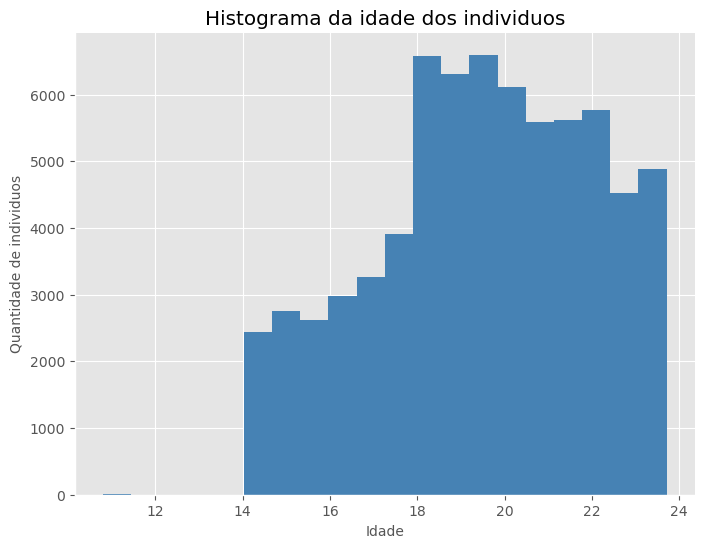

In [16]:
#Histograma das idades

fig, ax = plt.subplots(figsize=(8,6))

ax.hist(df.Idade,color = 'steelblue', bins = 20)
ax.set_xlabel('Idade', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Histograma da idade dos individuos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

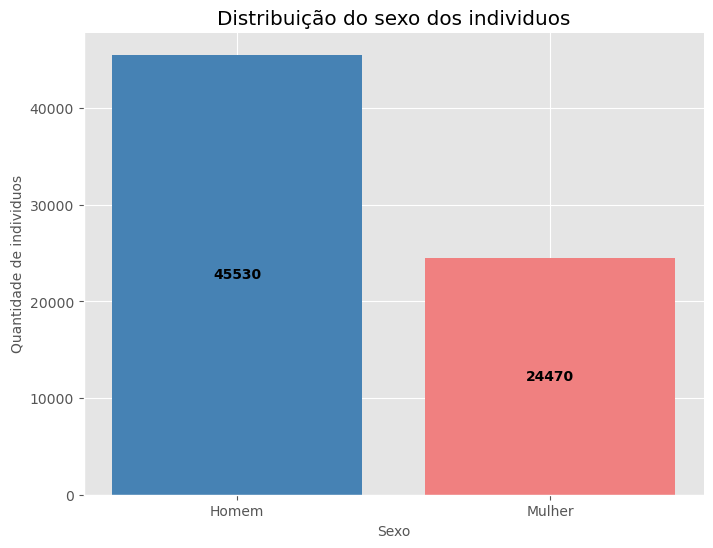

In [17]:
#Distribuição do sexo de cada participante
sexo_counts = df['Sexo'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(sexo_counts.index,sexo_counts.values ,color = ['steelblue','lightcoral'])
ax.set_xlabel('Sexo', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Distribuição do sexo dos individuos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')


plt.show()

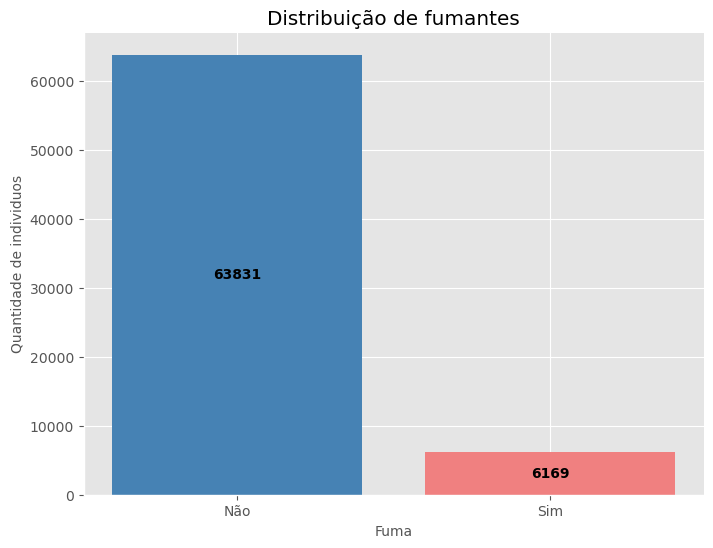

In [18]:
#Distribuição de fumantes
fuma_counts = df['Fuma'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(fuma_counts.index,fuma_counts.values ,color = ['steelblue','lightcoral'])
ax.set_xlabel('Fuma', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Distribuição de fumantes')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')


plt.show()

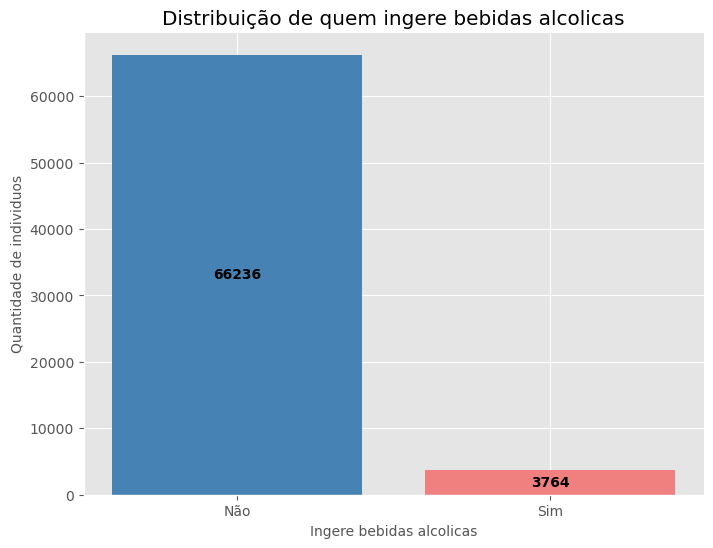

In [19]:
#Distribuição de quem Ingere bebidas alcolicas
bebe_counts = df['Ingere bebidas alcolicas'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(bebe_counts.index,bebe_counts.values ,color = ['steelblue','lightcoral'])
ax.set_xlabel('Ingere bebidas alcolicas', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Distribuição de quem ingere bebidas alcolicas')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')


plt.show()

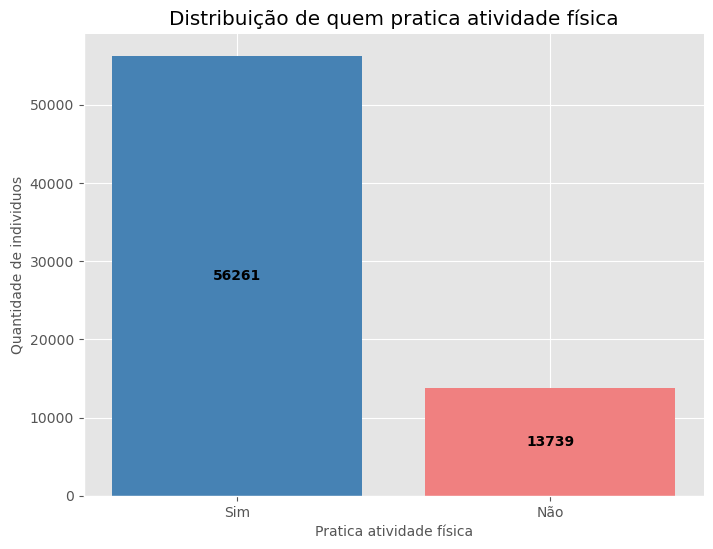

In [20]:
#Distribuição de quem Pratica atividade física
fisica_counts = df['Pratica atividade física'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(fisica_counts.index,fisica_counts.values ,color = ['steelblue','lightcoral'])
ax.set_xlabel('Pratica atividade física', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Distribuição de quem pratica atividade física')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')


plt.show()

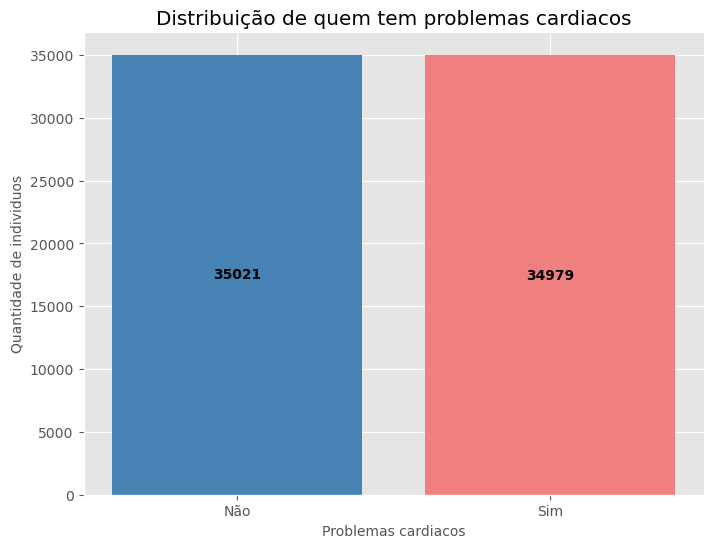

In [21]:
#Distribuição de quem tem problemas cardiacos

card_counts = df['Problemas cardiacos'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(card_counts.index,card_counts.values ,color = ['steelblue','lightcoral'])
ax.set_xlabel('Problemas cardiacos', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Distribuição de quem tem problemas cardiacos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')


plt.show()

Nessas analises exploratorias univáriavel podemos perceber que nossa população é majoritáriamente de homens adultos para idosos com bons hábitos de pratica de exercicio, não fumam e nem bebem e mesmo assim temos praticamente metade que tende a problemas cardiacos.

Agora vamos cruzar os dados para ver se realmente temos correlação entre eles ou se os problemas cardiacos não tem relação com os dados coletados.

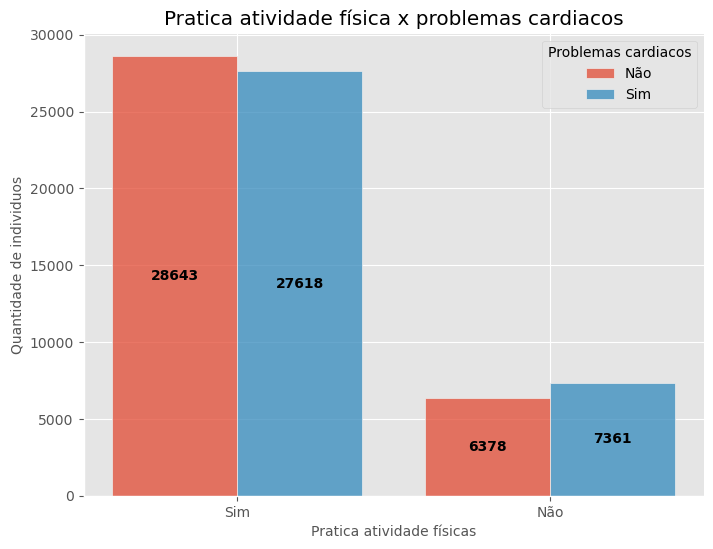

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="Pratica atividade física", hue="Problemas cardiacos", multiple="dodge",shrink=.8)
ax.set_xlabel('Pratica atividade físicas', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Pratica atividade física x problemas cardiacos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')

plt.show()

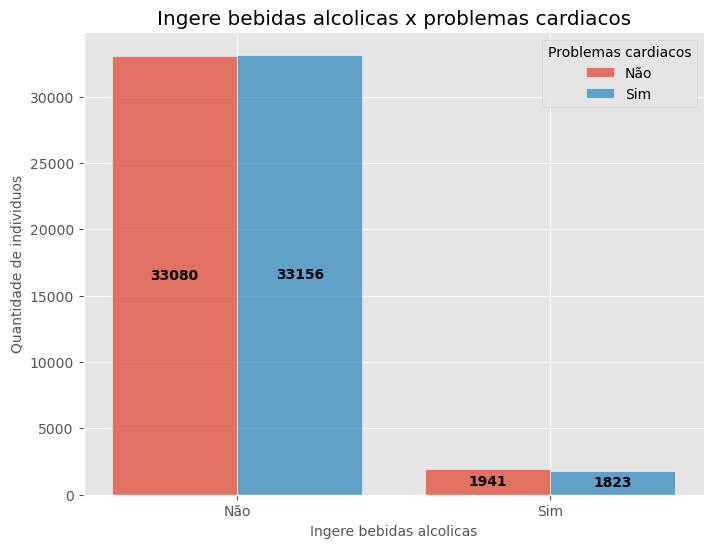

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="Ingere bebidas alcolicas", hue="Problemas cardiacos", multiple="dodge",shrink=.8)
ax.set_xlabel('Ingere bebidas alcolicas', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Ingere bebidas alcolicas x problemas cardiacos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')

plt.show()

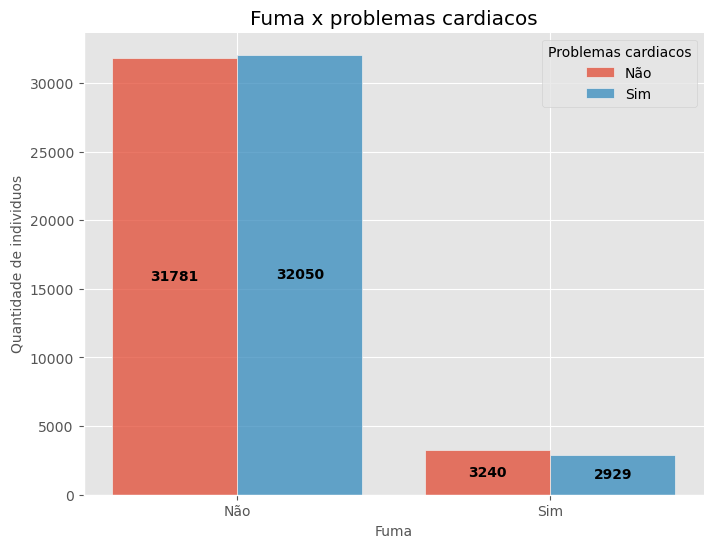

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="Fuma", hue="Problemas cardiacos", multiple="dodge",shrink=.8)
ax.set_xlabel('Fuma', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Fuma x problemas cardiacos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')

plt.show()

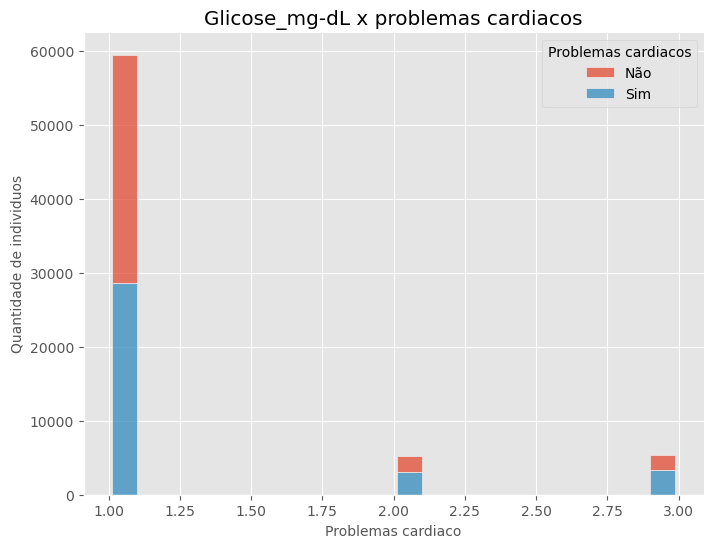

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="Glicose_mg-dL", hue="Problemas cardiacos", multiple="stack",shrink=.8)
ax.set_xlabel('Problemas cardiaco', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Glicose_mg-dL x problemas cardiacos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.show()

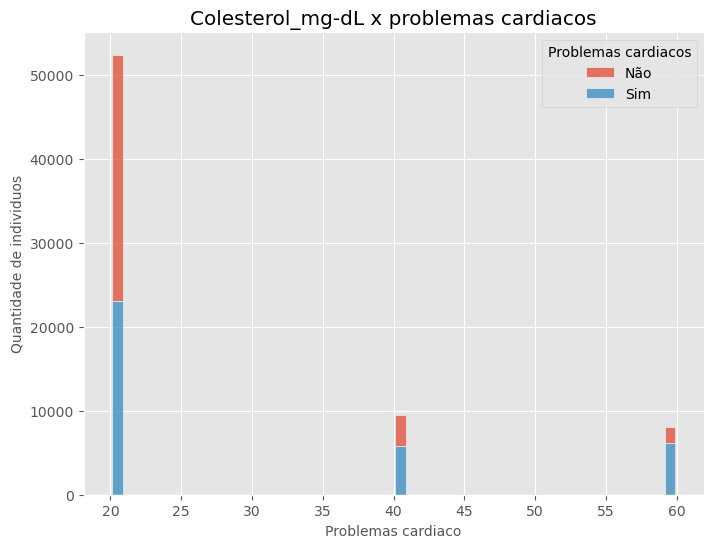

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="Colesterol_mg-dL", hue="Problemas cardiacos", multiple="stack",shrink=.8)
ax.set_xlabel('Problemas cardiaco', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Colesterol_mg-dL x problemas cardiacos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

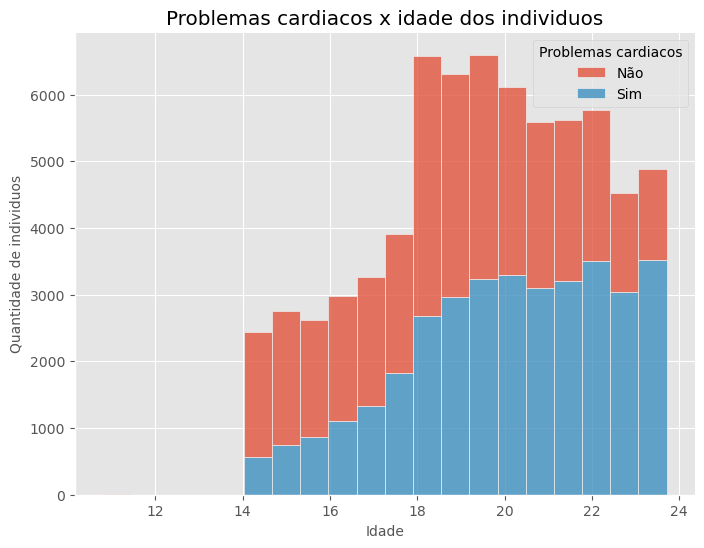

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="Idade",hue = 'Problemas cardiacos',  multiple="stack", bins = 20)
ax.set_xlabel('Idade', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Problemas cardiacos x idade dos individuos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

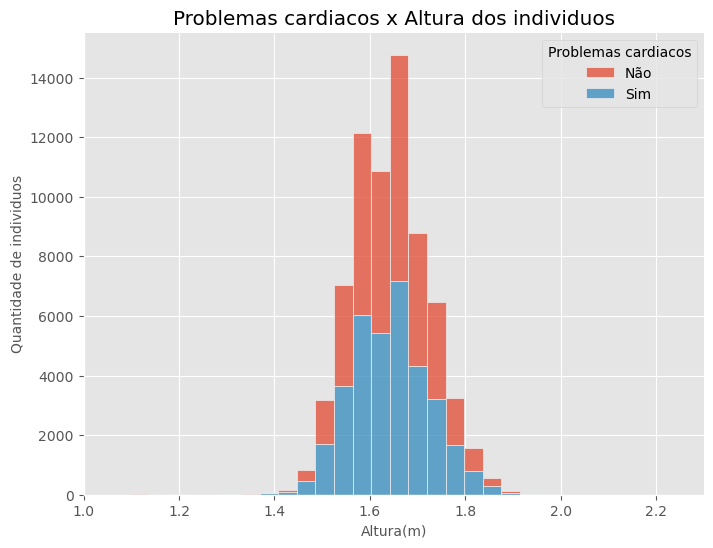

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="Altura",hue = 'Problemas cardiacos',  multiple="stack", bins = 50)
ax.set_xlabel('Altura(m)', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Problemas cardiacos x Altura dos individuos')

ax.set_xlim(1,2.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

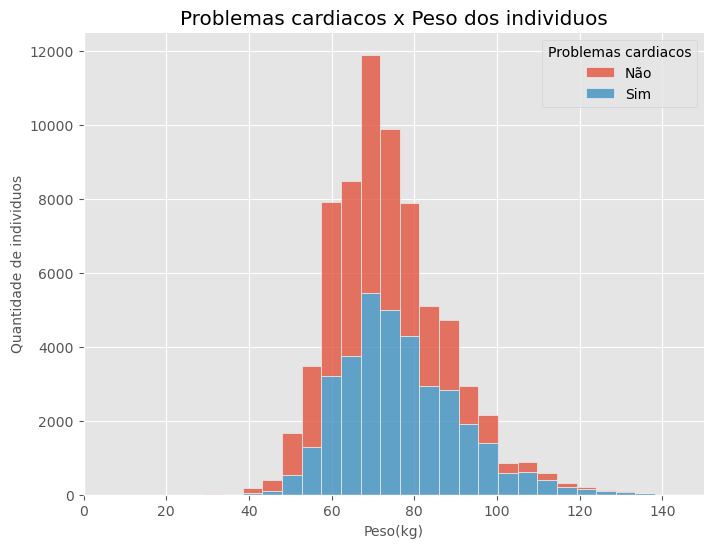

In [29]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="Peso_kg",hue = 'Problemas cardiacos',  multiple="stack", bins = 40)
ax.set_xlabel('Peso(kg)', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Problemas cardiacos x Peso dos individuos')

ax.set_xlim(0,150)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

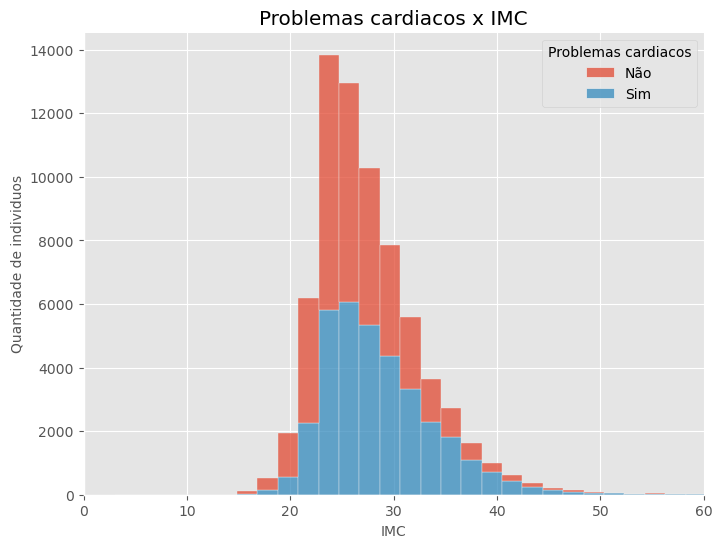

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x="IMC",hue = 'Problemas cardiacos',  multiple="stack", bins = 150)
ax.set_xlabel('IMC', fontsize = 10)
ax.set_ylabel('Quantidade de individuos', fontsize = 10)
ax.set_title('Problemas cardiacos x IMC')

ax.set_xlim(0,60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

In [31]:
df.corr(numeric_only = True)

,Idade,Altura,Peso_kg,Pressão arterial sistólica,Pressão arterial diastólica,Colesterol_mg-dL,Glicose_mg-dL,IMC
Idade,1.000000,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,0.085585
Altura,-0.081515,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,-0.290302
Peso_kg,0.053684,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.760977
Pressão arterial sistólica,0.020764,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,0.024870
Pressão arterial diastólica,0.017647,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.034780
Colesterol_mg-dL,0.154424,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.145980
Glicose_mg-dL,0.098703,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,0.101324
IMC,0.085585,-0.290302,0.760977,0.024870,0.034780,0.145980,0.101324,1.000000


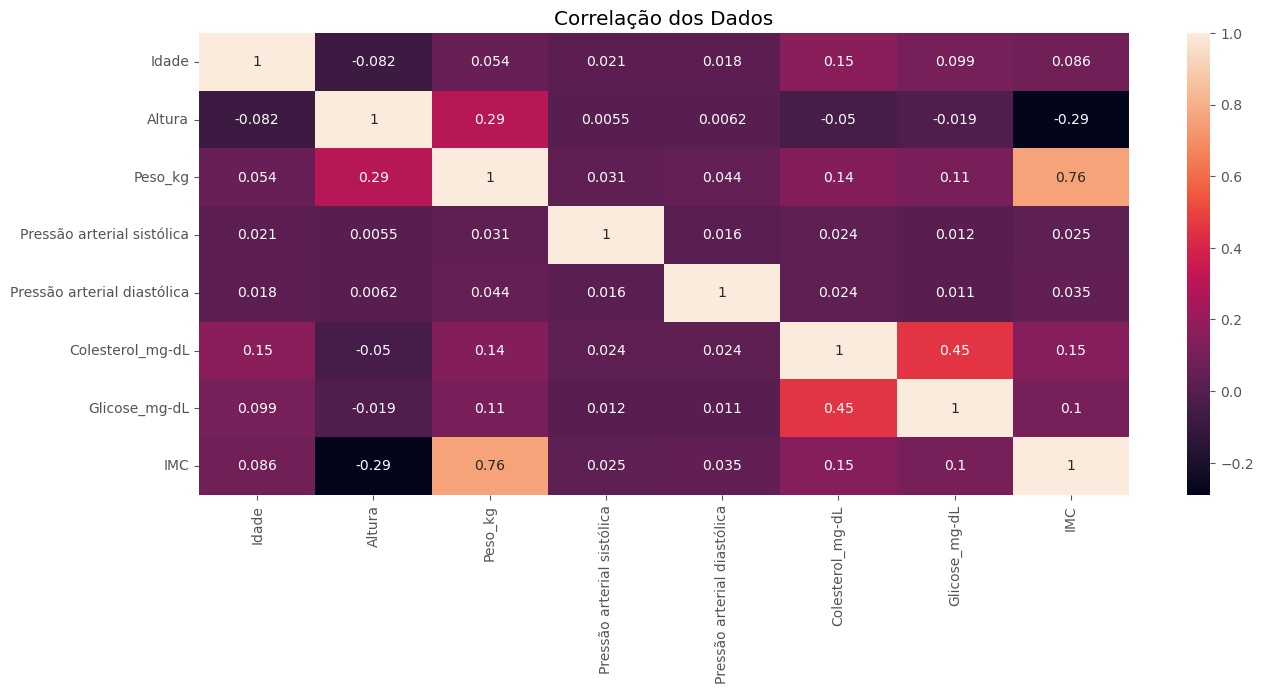

In [32]:
# HeatMAP dos dados

plt.figure(figsize=(15,6))
plt.title('Correlação dos Dados')

correlacao = df.corr(numeric_only = True)
sns.heatmap(correlacao, annot=True);

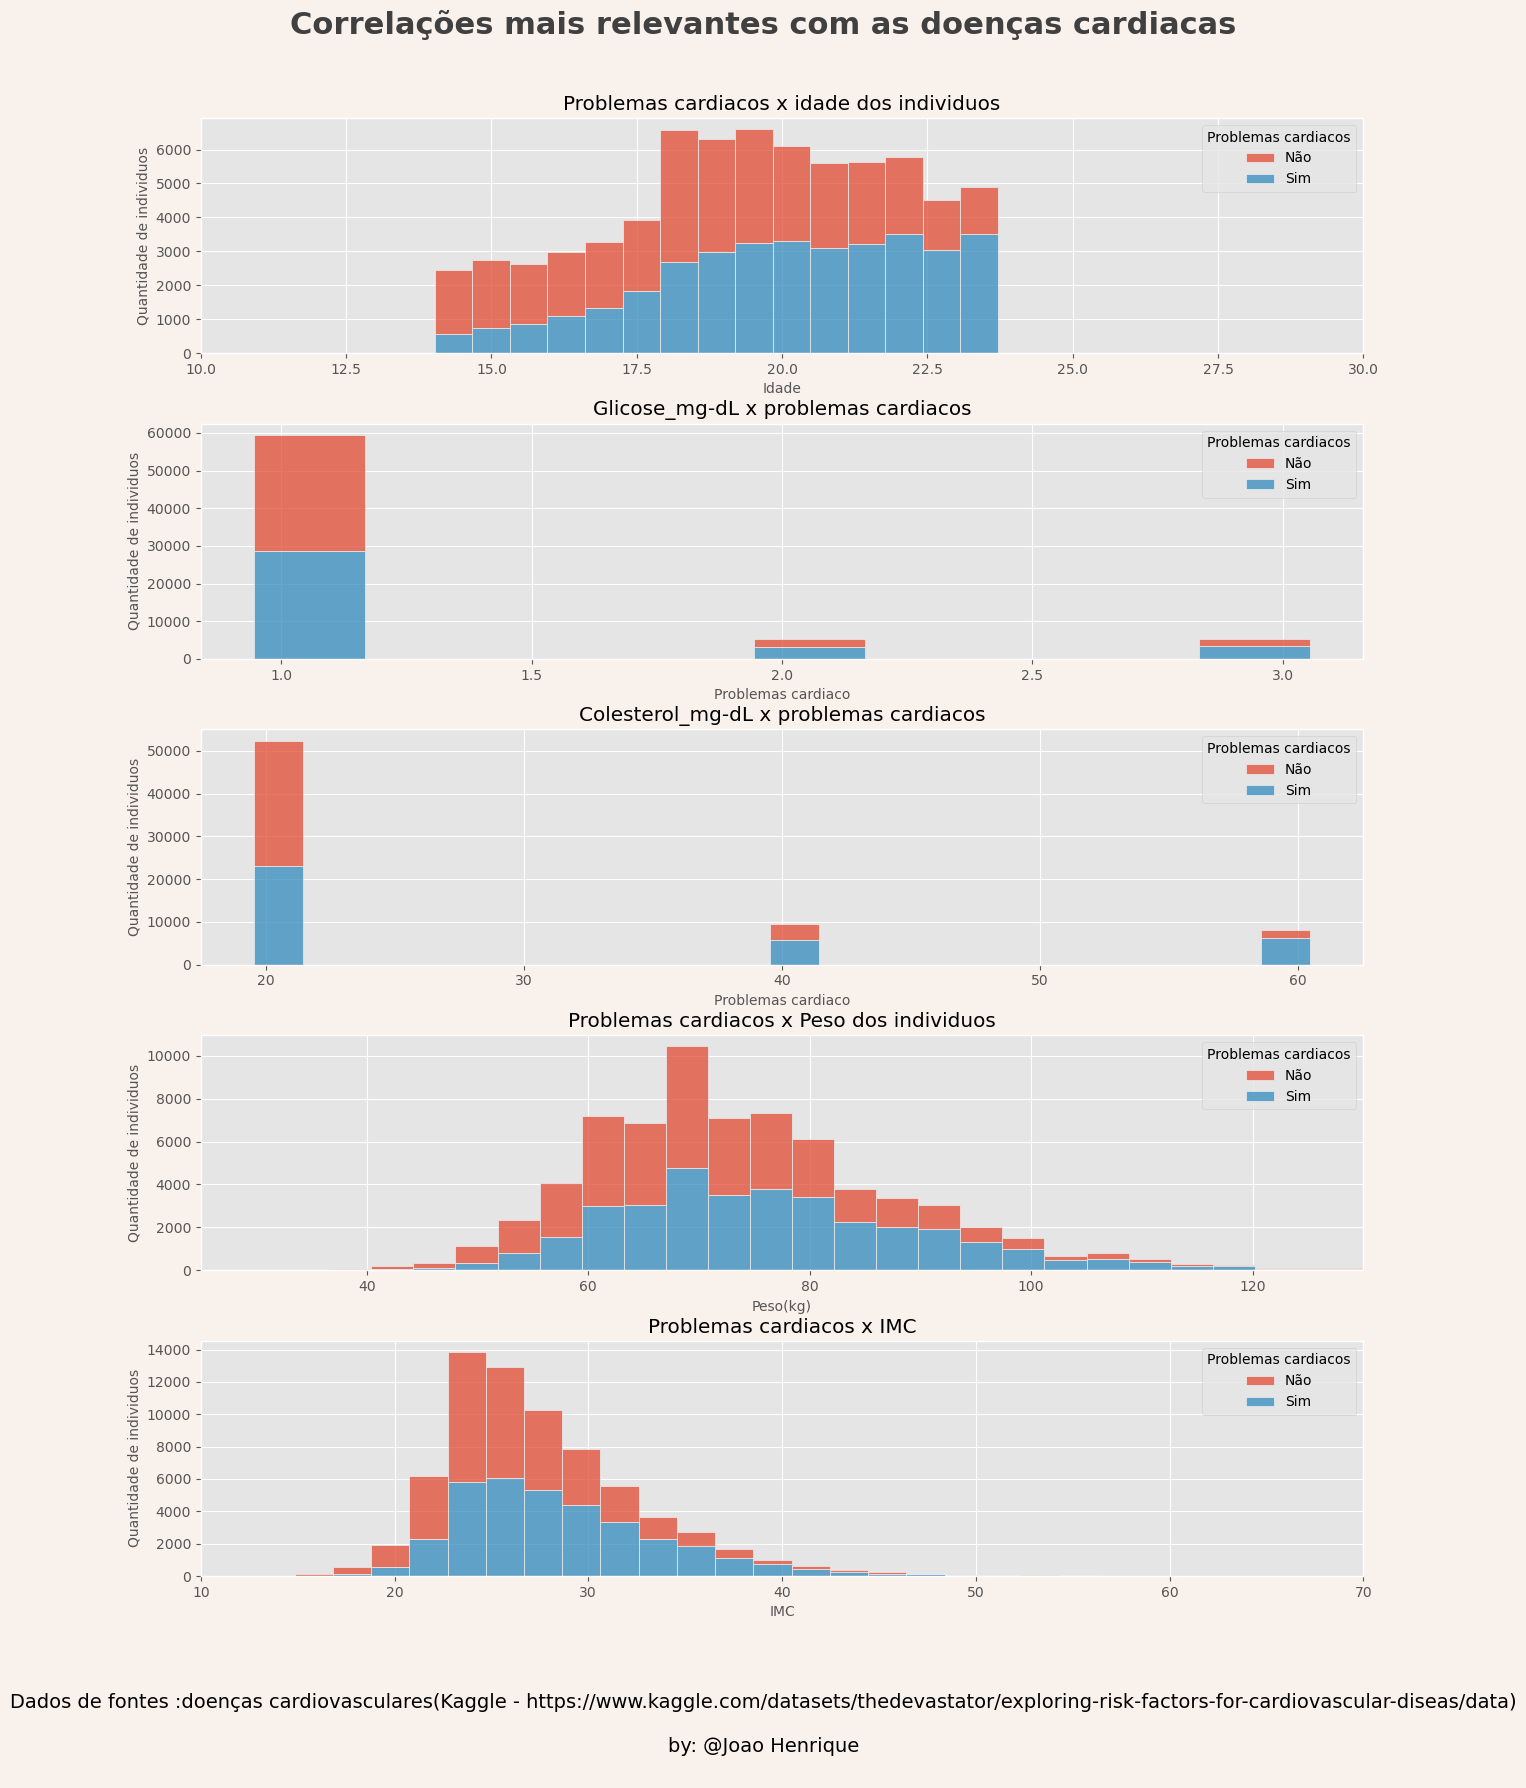

In [34]:
# Tamanho do relatório
figura, eixo = plt.subplots(figsize=(15,18))

#Cor de fundo

cor_fundo = '#f9f1ec'
eixo.set_facecolor(cor_fundo)
figura.set_facecolor(cor_fundo)

# Paleta de cores
paleta_cores = sns.color_palette('flare',7)

# Estilo no gráfico
plt.style.use('ggplot')

#Titulo
plt.suptitle('Correlações mais relevantes com as doenças cardiacas',
             fontsize=22,color='#404040', fontweight=600)

#Estrutura
linhas = 5
colunas = 1




plt.subplot(linhas,colunas, 1)
sns.histplot(data=df, x="Idade",hue = 'Problemas cardiacos',  multiple="stack", bins =20)
plt.xlabel('Idade', fontsize = 10)
plt.ylabel('Quantidade de individuos', fontsize = 10)
plt.xlim(10,30)
plt.title('Problemas cardiacos x idade dos individuos');

plt.subplot(linhas,colunas, 2)
sns.histplot(data=df, x="Glicose_mg-dL", hue="Problemas cardiacos", multiple="stack",shrink=2)
plt.xlabel('Problemas cardiaco', fontsize = 10)
plt.ylabel('Quantidade de individuos', fontsize = 10)
plt.title('Glicose_mg-dL x problemas cardiacos');


plt.subplot(linhas,colunas, 3)
sns.histplot(data=df, x="Colesterol_mg-dL", hue="Problemas cardiacos", multiple="stack",shrink=2)
plt.xlabel('Problemas cardiaco', fontsize = 10)
plt.ylabel('Quantidade de individuos', fontsize = 10)
plt.title('Colesterol_mg-dL x problemas cardiacos');


plt.subplot(linhas,colunas, 4)
sns.histplot(data=df, x="Peso_kg",hue = 'Problemas cardiacos',  multiple="stack", bins = 50)
plt.xlabel('Peso(kg)', fontsize = 10)
plt.ylabel('Quantidade de individuos', fontsize = 10)
plt.xlim(25,130)
plt.title('Problemas cardiacos x Peso dos individuos')



plt.subplot(linhas,colunas, 5)
sns.histplot(data=df, x="IMC",hue = 'Problemas cardiacos',  multiple="stack", bins = 150)
plt.xlabel('IMC', fontsize = 10)
plt.ylabel('Quantidade de individuos', fontsize = 10)
plt.xlim(10,70)
plt.title('Problemas cardiacos x IMC')



#Rodapé

rodape='''
Dados de fontes :doenças cardiovasculares(Kaggle - https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data)

by: @Joao Henrique
'''

figura.text(0.5, 0.00, rodape, ha='center', size=14);

#Ajuste de layout

plt.subplots_adjust(top=0.92, hspace=0.3);


## 5. Conclusão

Com esses insights gerados pelos cruzamentos de dados, podemos observar que os fatores mais relevantes que estão atrelados no número de pessoas com doenças cardiacas é alto indice de Gligoce e colesterol, Peso elevado, IMC elevado e Idade elevada.

Algo que já é uma primicia, mais constatamos mais uma vez com dados é manter bons hábitos para que o IMC seja o ideal, manter os nivels de glicose e colesterol controlados ajuda a não contrair doenças cardiacas.

Os outros fatores apenas por essas analises feitas não foi possivel correlacionar e nem afirmar se influênciam diretamente se a pessoa tem problemas cardiacos ou não.

Algumas ações para a melhoria dessa analise no futuro é:

- Desenvolver algoritmo para gerar insigths com Pressão arterial, ver o que ela pode influênciar nessas descobertas. 
- Entender o porque de não ocorrer uma relação mais vertical qual se correlaciona mal-habitos(fumar, não praticar atividade fisica, beber) com doença cardiaca.